## Observations and Insights 

In [271]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results, on="Mouse ID")
# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [272]:
# Checking the number of mice.
len(combined_data["Mouse ID"])

1893

In [273]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_timepoint = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'],keep ="last")
unique_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [274]:
# Optional: Get all the data for the duplicate mouse ID. 
unique_timepoint.info()
unique_timepoint

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Drug Regimen        1888 non-null   object 
 2   Sex                 1888 non-null   object 
 3   Age_months          1888 non-null   int64  
 4   Weight (g)          1888 non-null   int64  
 5   Timepoint           1888 non-null   int64  
 6   Tumor Volume (mm3)  1888 non-null   float64
 7   Metastatic Sites    1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [275]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_ID = combined_data.drop_duplicates(subset=['Mouse ID'])
unique_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [276]:
# Checking the number of mice in the clean DataFrame.
len(unique_ID["Mouse ID"])

249

## Summary Statistics

In [277]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
print(unique_timepoint["Tumor Volume (mm3)"].mean(),
unique_timepoint["Tumor Volume (mm3)"].median(),
unique_timepoint["Tumor Volume (mm3)"].var(),
unique_timepoint["Tumor Volume (mm3)"].std())
sem(unique_timepoint["Tumor Volume (mm3)"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_name = unique_timepoint.groupby("Drug Regimen")

drug_name["Drug Regimen"]
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
print(drug_name["Tumor Volume (mm3)"].mean(),
drug_name["Tumor Volume (mm3)"].median(),
drug_name["Tumor Volume (mm3)"].var(),
drug_name["Tumor Volume (mm3)"].std())
#sem(drug_name["Tumor Volume (mm3)"])


# Assemble the resulting series into a single summary dataframe.



50.44841133656781 48.951421075 79.29460645419073 8.904751903011713
Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.382993
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64 Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64 Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.220205
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64 Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ke

In [278]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

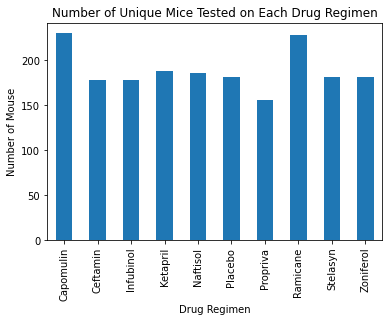

<Figure size 432x288 with 0 Axes>

In [279]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_mouse = drug_name['Mouse ID'].count()
drug_chart = drug_mouse.plot(kind="bar", title="Number of Unique Mice Tested on Each Drug Regimen")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Mouse")

plt.show()
plt.tight_layout()

In [280]:
# get the list of drug names
names = combined_data.iloc[:,1].unique()
namelist = names.tolist()
namelist

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

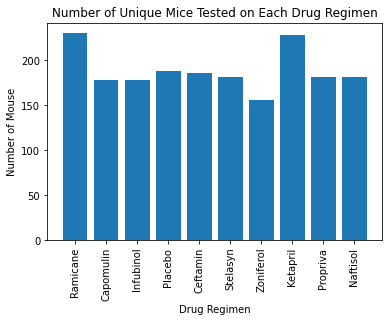

In [281]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_mouse_count = []
for y in drug_mouse:
    drug_mouse_count.append(y)

plt.bar(namelist, drug_mouse_count, align="center")
plt.title("Number of Unique Mice Tested on Each Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse')
plt.xticks(rotation = 90)
plt.show()


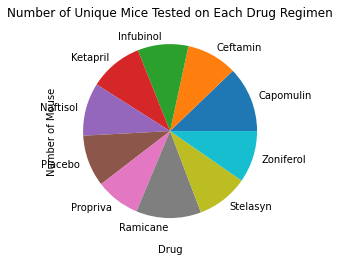

<Figure size 432x288 with 0 Axes>

In [282]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

drug_chart = drug_mouse.plot(kind="pie", title="Number of Unique Mice Tested on Each Drug Regimen")
drug_chart.set_xlabel("Drug")
drug_chart.set_ylabel("Number of Mouse")

plt.show()
plt.tight_layout()


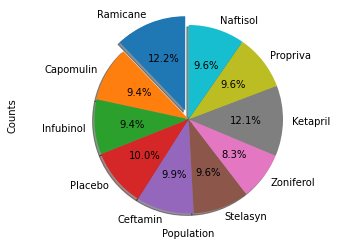

In [283]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode = (0.1, 0, 0, 0,0,0,0,0,0,0)
plt.pie(drug_mouse_count,explode=explode, labels=namelist,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.xlabel('Population')
plt.ylabel('Counts')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [292]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_unique = unique_timepoint.groupby("Mouse ID")
max_timepoint = mouse_unique["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_volume = max_timepoint.merge(unique_timepoint, on = ["Mouse ID","Timepoint"])
last_volume
## Another thought on how to get thr four grugs dataframe
    #last_1= last_volume[(last_volume['Drug Regimen']=='Capomulin')]
    #last_2= last_volume[(last_volume['Drug Regimen']=="Ramicane" )]
    #last_3= last_volume[(last_volume['Drug Regimen']=="Infubinol")]
    #last_4= last_volume[(last_volume['Drug Regimen']=="Ceftamin")]
    #final_volume = last_1.append([last_2,last_3,last_4])
    #final_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [293]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = final_volume.iloc[:,2].unique()
treatmentlist = treatment.tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for t in treatmentlist:
    print(f'Result analysis after {t} treatment.')
    treatments = pd.DataFrame(last_volume.loc[last_volume["Drug Regimen"] == t,:]).reset_index()
    tumor_vol_data.append(treatments["Tumor Volume (mm3)"])
    #print(treatments)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = treatments["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    
    first_quartile = quartiles[0.25]
    print(f'The first quartile is: {first_quartile}')
    
    second_quartile = quartiles[0.5]
    print(f'The second quartile is: {second_quartile}')
    
    third_quartile = quartiles[0.75]
    print(f'The third quartile is: {third_quartile}')
    
    IQR = third_quartile - first_quartile
    print(f'The IQR is: {IQR}')
    

    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = first_quartile - (1.5*IQR)
    upper_bound = third_quartile + (1.5*IQR)
    print(f'If the value lower than {lower_bound} or higher than upper_bound, it is a outlier.' )
    print('-----------------------------')
    

Result analysis after Capomulin treatment.
The first quartile is: 32.37735684
The second quartile is: 38.125164399999996
The third quartile is: 40.1592203
The IQR is: 7.781863460000004
If the value lower than 20.70456164999999 or higher than upper_bound, it is a outlier.
-----------------------------
Result analysis after Ramicane treatment.
The first quartile is: 31.56046955
The second quartile is: 36.56165229
The third quartile is: 40.65900627
The IQR is: 9.098536719999998
If the value lower than 17.912664470000003 or higher than upper_bound, it is a outlier.
-----------------------------
Result analysis after Infubinol treatment.
The first quartile is: 54.04860769
The second quartile is: 60.16518046
The third quartile is: 65.52574285
The IQR is: 11.477135160000003
If the value lower than 36.83290494999999 or higher than upper_bound, it is a outlier.
-----------------------------
Result analysis after Ceftamin treatment.
The first quartile is: 48.72207785
The second quartile is: 59.8

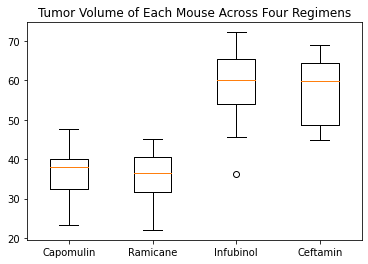

In [294]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Each Mouse Across Four Regimens')
ax1.boxplot(tumor_vol_data)
plt.xticks([1, 2, 3, 4], treatmentlist)
plt.show()

## Line and Scatter Plots

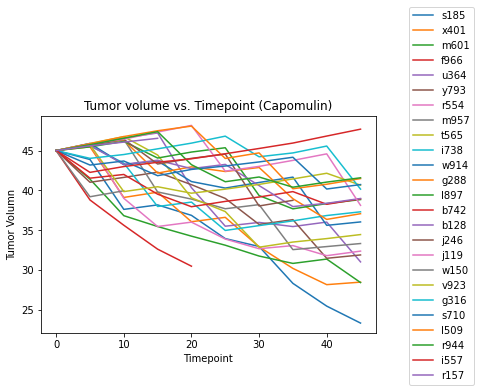

In [308]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = pd.DataFrame(combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]).reset_index()

# generate the list of mouse id
mouse_id = Capomulin_df.iloc[:,1].unique()
mouselist = mouse_id.tolist()
mouselist

# Plot
for mouse in mouselist:
    Capomulin_onemouse_df = pd.DataFrame(Capomulin_df.loc[Capomulin_df["Mouse ID"] == mouse,:]).reset_index()
    time = Capomulin_onemouse_df["Timepoint"].to_list()
    volume = Capomulin_onemouse_df["Tumor Volume (mm3)"].to_list()
    Capomulin_vs_time,= plt.plot(time, volume, label= mouse)

# Cleaning the format    
plt.title('Tumor volume vs. Timepoint (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volumn') 
plt.legend(bbox_to_anchor=(1.1, 1.5), loc='upper left', borderaxespad=0.)


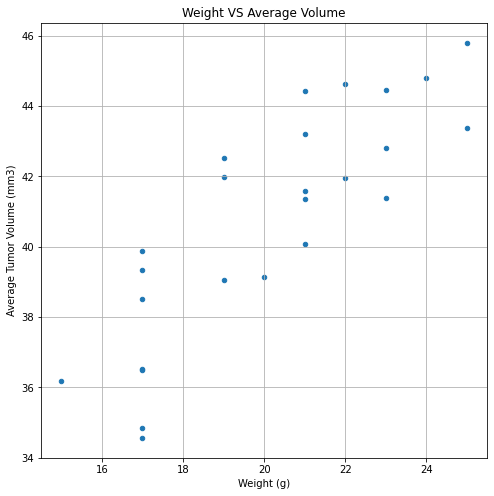

In [326]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
group_by_mouse = Capomulin_df.groupby(["Mouse ID"])
weight_vs_volume_df = group_by_mouse[["Weight (g)", "Tumor Volume (mm3)"]]
mean_df = weight_vs_volume_df.mean()
mean_df = mean_df.rename(columns = {"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
mean_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Weight VS Average Volume")
plt.show()


## Correlation and Regression

In [297]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [298]:
Capomulin_df


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...,...
225,440,i557,Capomulin,Female,1,24,45,47.685963,1
226,1452,r157,Capomulin,Male,22,25,0,45.000000,0
227,1453,r157,Capomulin,Male,22,25,5,45.597064,0
228,1454,r157,Capomulin,Male,22,25,10,46.059608,0


<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7ffc11a4d310>>